CS 412 Project - Predicting Match Outcomes and Betting Strategy Based on Previous Match and Player Data

In [2]:
import pandas as pd
import sqlite3

In [3]:
conn = sqlite3.connect('/Users/sharanmehta/Desktop/UIUC/FALL 2024/CS 412/project/Data/Database.sqlite')
tables = ['Country', 'League', 'Match', 'Player', 'Player_Attributes', 'Team', 'Team_Attributes']
dataframes = {table: pd.read_sql(f'SELECT * FROM {table}', conn) for table in tables}

# Display the number of rows and columns in each table
for table, df in dataframes.items():
    print(f"Table: {table}, Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Table: Country, Rows: 11, Columns: 2
Table: League, Rows: 11, Columns: 3
Table: Match, Rows: 25979, Columns: 115
Table: Player, Rows: 11060, Columns: 7
Table: Player_Attributes, Rows: 183978, Columns: 42
Table: Team, Rows: 299, Columns: 5
Table: Team_Attributes, Rows: 1458, Columns: 25


In [4]:
for table, df in dataframes.items():
    print(f"\nMissing values in {table}:")
    print(df.isnull().sum())


Missing values in Country:
id      0
name    0
dtype: int64

Missing values in League:
id            0
country_id    0
name          0
dtype: int64

Missing values in Match:
id                0
country_id        0
league_id         0
season            0
stage             0
              ...  
GBD           11817
GBA           11817
BSH           11818
BSD           11818
BSA           11818
Length: 115, dtype: int64

Missing values in Player:
id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64

Missing values in Player_Attributes:
id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        8

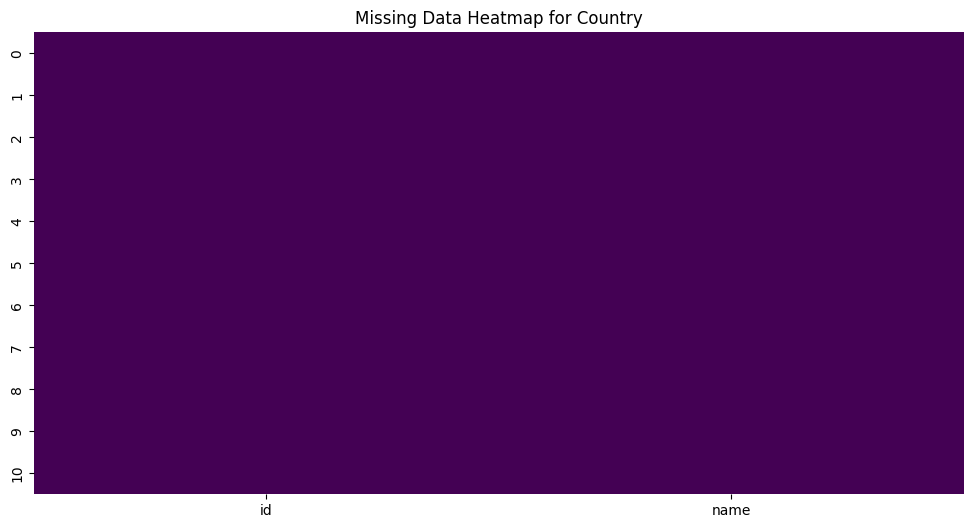

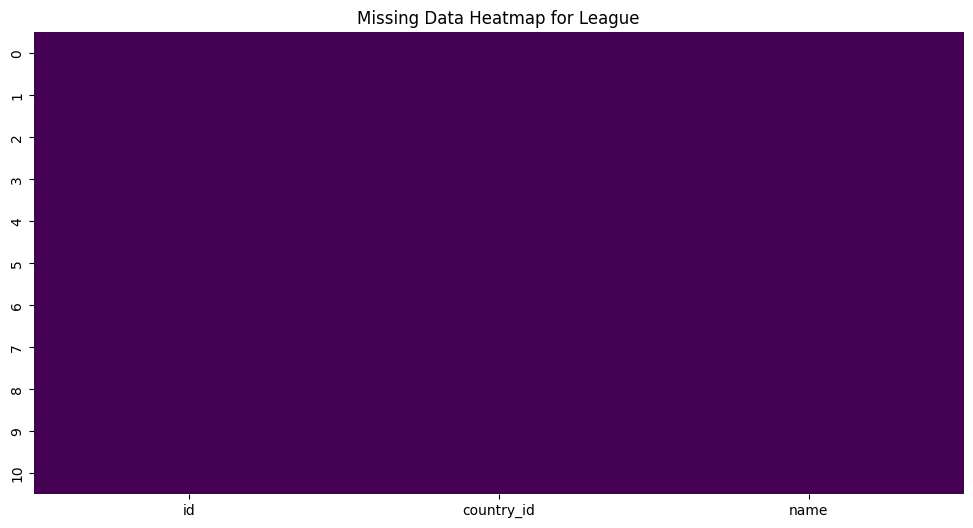

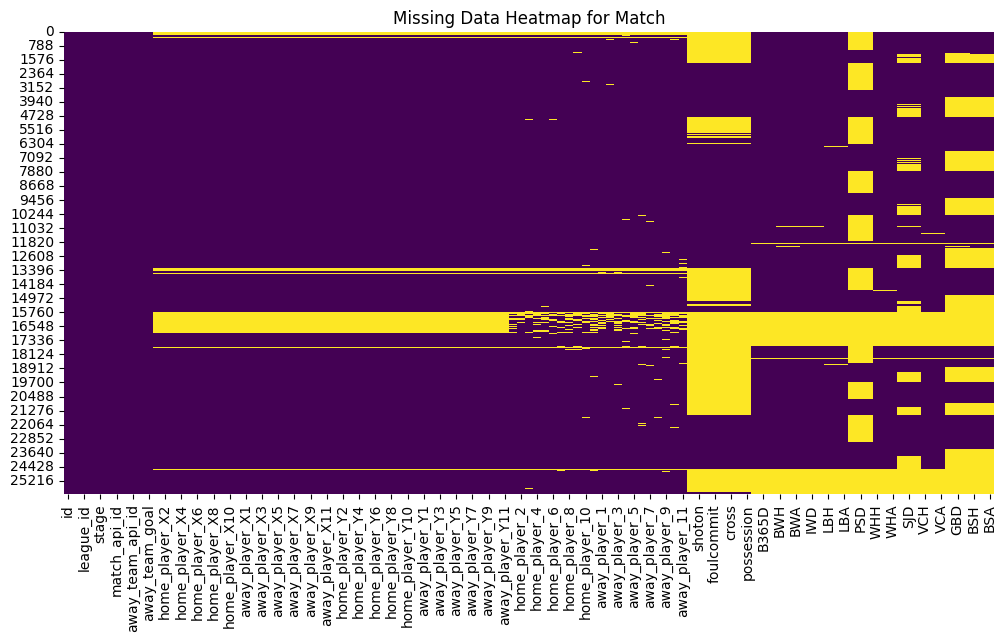

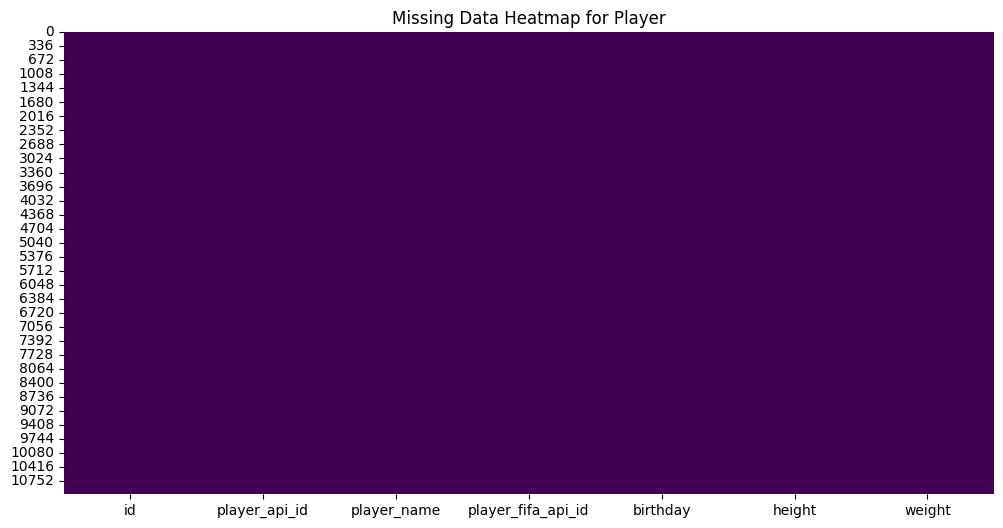

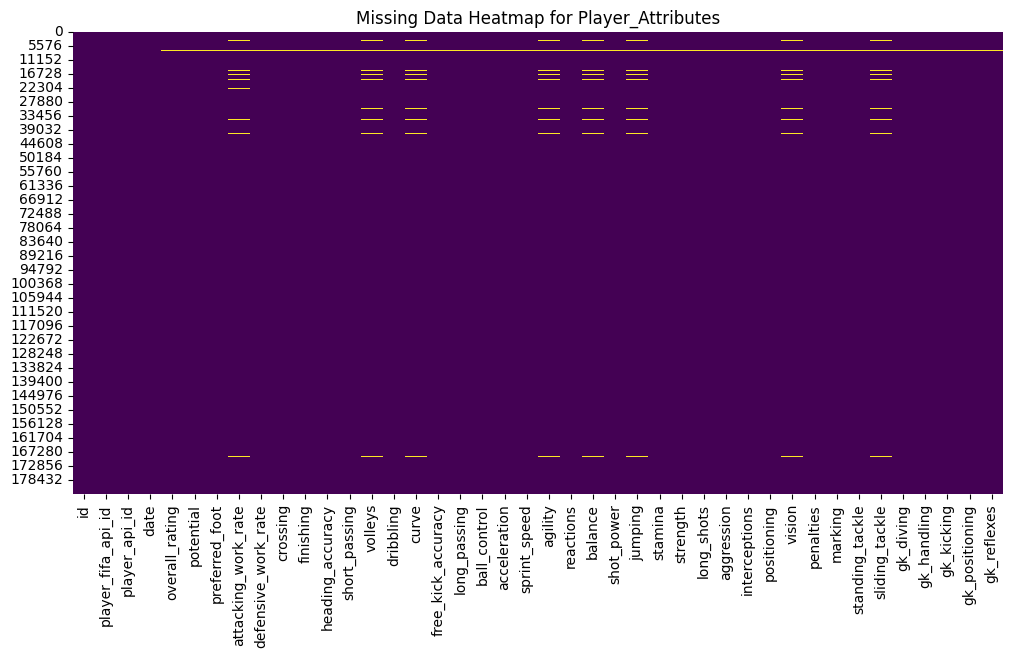

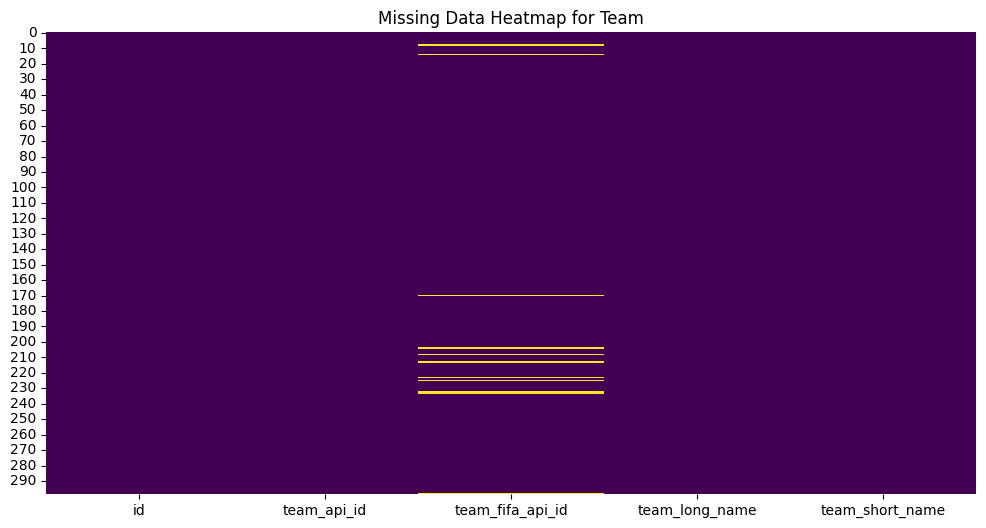

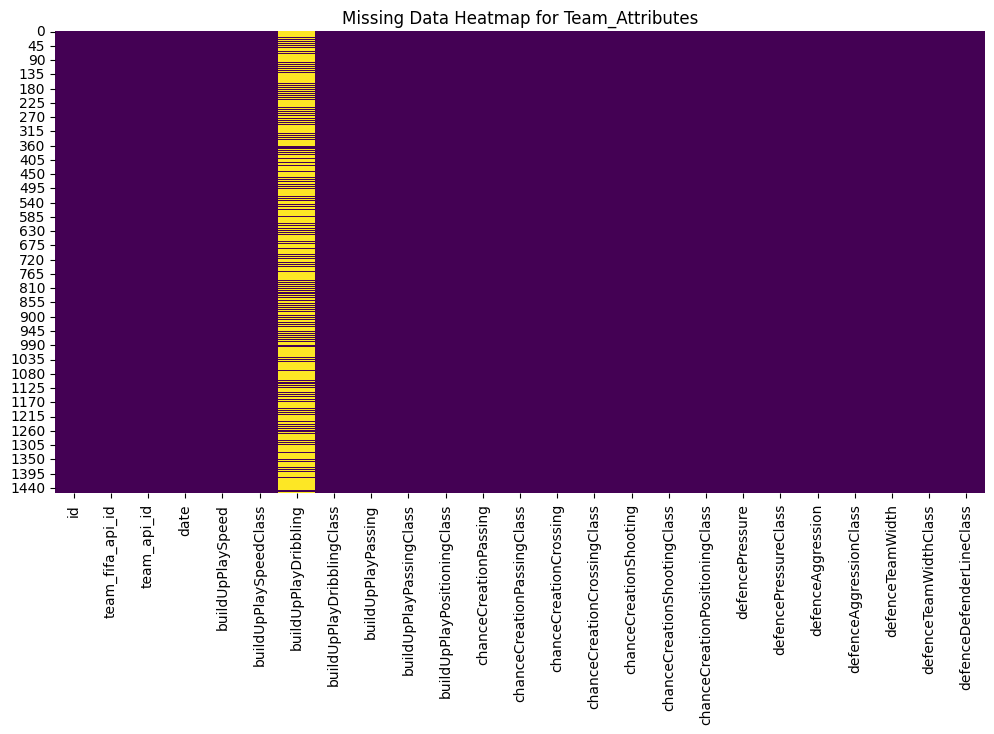

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

for table, df in dataframes.items():
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title(f'Missing Data Heatmap for {table}')
    plt.show()

In [6]:
for table, df in dataframes.items():
    print(f"\nData types in {table}:")
    print(df.dtypes)
    for column in df.columns:
        print(f"Unique values in {column}: {df[column].nunique()}")



Data types in Country:
id       int64
name    object
dtype: object
Unique values in id: 11
Unique values in name: 11

Data types in League:
id             int64
country_id     int64
name          object
dtype: object
Unique values in id: 11
Unique values in country_id: 11
Unique values in name: 11

Data types in Match:
id              int64
country_id      int64
league_id       int64
season         object
stage           int64
               ...   
GBD           float64
GBA           float64
BSH           float64
BSD           float64
BSA           float64
Length: 115, dtype: object
Unique values in id: 25979
Unique values in country_id: 11
Unique values in league_id: 11
Unique values in season: 8
Unique values in stage: 38
Unique values in date: 1694
Unique values in match_api_id: 25979
Unique values in home_team_api_id: 299
Unique values in away_team_api_id: 299
Unique values in home_team_goal: 11
Unique values in away_team_goal: 10
Unique values in home_player_X1: 3
Unique values i

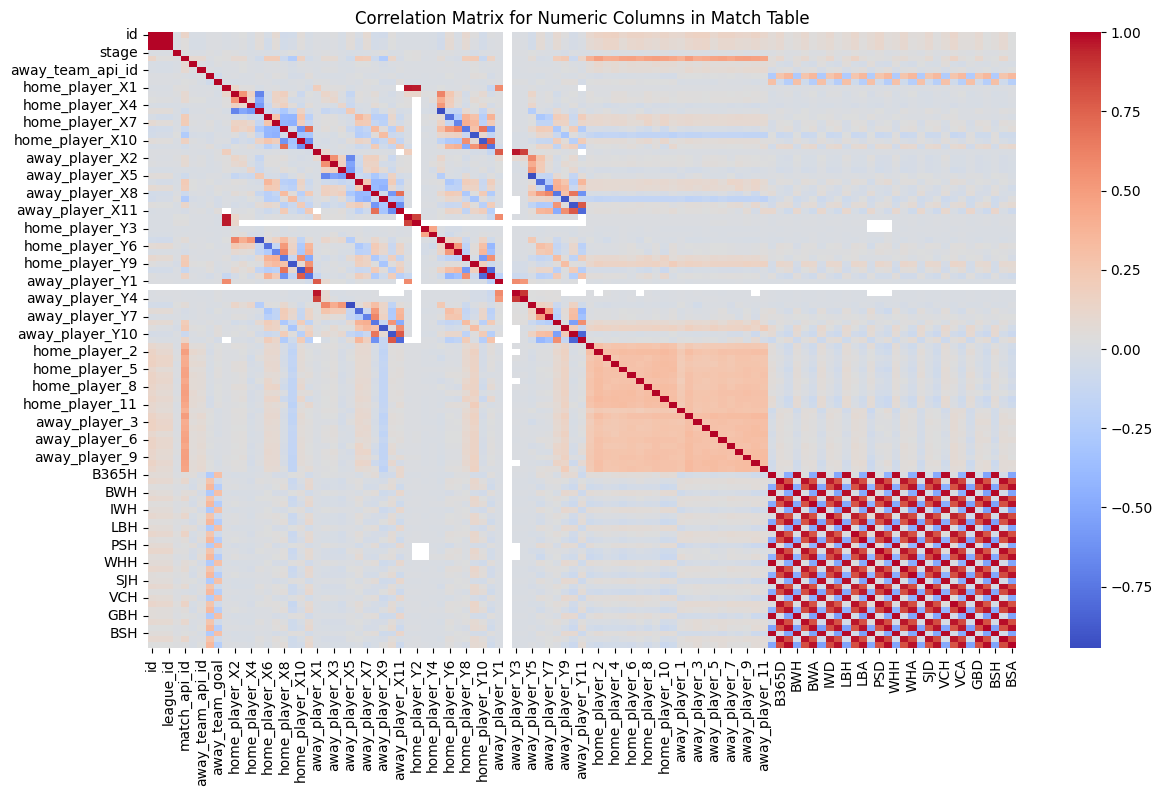

In [7]:
match_df = dataframes['Match']

# Select only numeric columns
numeric_match_df = match_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_match_df.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix for Numeric Columns in Match Table')
plt.show()


In [8]:
match_df = pd.read_sql('SELECT * FROM Match WHERE league_id IN (1729, 4769, 7809, 10257, 19694, 21518)', conn)
print(f"Rows: {match_df.shape[0]}, Columns: {match_df.shape[1]}")
match_df.head()
match_df.info()
match_df.describe()



Rows: 16409, Columns: 115
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16409 entries, 0 to 16408
Columns: 115 entries, id to BSA
dtypes: float64(54), int64(51), object(10)
memory usage: 14.4+ MB


,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,16409.000000,16409.000000,16409.000000,16409.000000,1.640900e+04,16409.000000,16409.000000,16409.000000,16409.000000,16409.000000,...,12476.000000,16378.000000,16378.000000,16378.000000,10221.000000,10221.00000,10221.000000,10225.000000,10225.000000,10225.00000
mean,11836.033701,10430.391675,10430.391675,19.190810,1.199187e+06,9470.929429,9471.092693,1.526967,1.147236,1.000061,...,4.604683,2.667045,3.872863,4.838575,2.492012,3.62406,4.335759,2.492891,3.634681,4.39299
std,7280.634146,7301.610082,7301.610082,10.828169,4.947546e+05,7639.604146,7639.589943,1.290514,1.132018,0.007807,...,3.644142,1.926711,1.289781,4.375626,1.475172,0.87003,2.970306,1.495383,0.863248,3.16532
min,1729.000000,1729.000000,1729.000000,1.000000,4.831290e+05,4087.000000,4087.000000,0.000000,0.000000,1.000000,...,1.100000,1.030000,1.620000,1.080000,1.050000,1.45000,1.120000,1.040000,1.330000,1.12000
25%,5831.000000,4769.000000,4769.000000,10.000000,8.205050e+05,8533.000000,8533.000000,1.000000,0.000000,1.000000,...,2.615000,1.730000,3.250000,2.600000,1.700000,3.20000,2.600000,1.700000,3.250000,2.62000
50%,9933.000000,7809.000000,7809.000000,19.000000,1.216821e+06,8686.000000,8686.000000,1.000000,1.000000,1.000000,...,3.500000,2.150000,3.500000,3.600000,2.100000,3.30000,3.400000,2.100000,3.300000,3.40000
75%,20455.000000,19694.000000,19694.000000,29.000000,1.709701e+06,9873.000000,9873.000000,2.000000,2.000000,1.000000,...,5.000000,2.800000,4.000000,5.250000,2.600000,3.70000,5.000000,2.620000,3.750000,5.00000
max,24557.000000,21518.000000,21518.000000,38.000000,2.216672e+06,208931.000000,208931.000000,10.000000,9.000000,2.000000,...,41.000000,36.000000,26.000000,67.000000,21.000000,11.00000,34.000000,17.000000,13.000000,34.00000


In [9]:
# Calculate missing values in each column
missing_values = match_df.isnull().sum().sort_values(ascending=False)

# Display columns with missing values
print(missing_values[missing_values > 0])

PSA                8219
PSD                8219
PSH                8219
GBA                6188
GBD                6188
                   ... 
B365D                12
B365H                12
B365A                12
away_player_Y11       5
away_player_X11       5
Length: 62, dtype: int64


PSH      8219
PSD      8219
PSA      8219
GBD      6188
GBH      6188
GBA      6188
BSH      6184
BSD      6184
BSA      6184
SJH      3933
SJD      3933
SJA      3933
IWD        50
IWA        50
IWH        50
VCH        31
VCD        31
VCA        31
BWA        27
BWD        27
BWH        27
LBA        19
LBD        19
LBH        19
WHH        17
WHA        17
WHD        17
B365D      12
B365A      12
B365H      12
dtype: int64


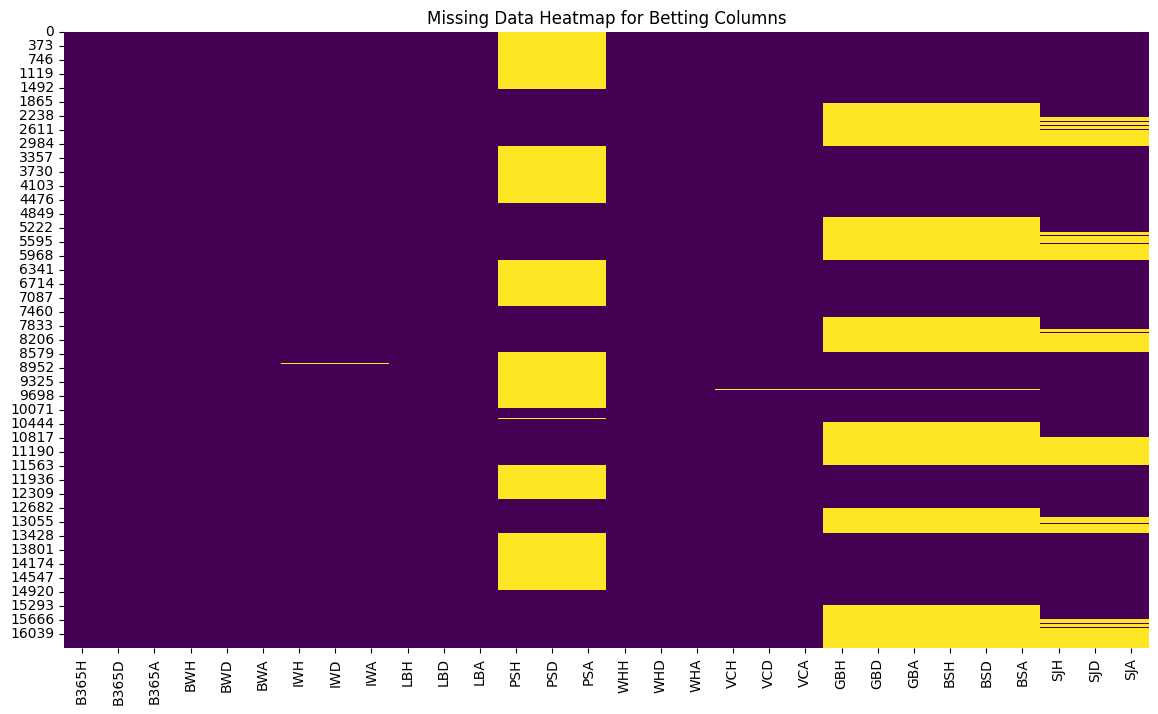

In [10]:
# List of all 30 betting columns
betting_columns = ['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 
                   'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 
                   'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA', 
                   'SJH', 'SJD', 'SJA']

# Check missing values in these betting columns
betting_missing = match_df[betting_columns].isnull().sum().sort_values(ascending=False)
print(betting_missing)

# Visualize missing values for these betting columns using a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(match_df[betting_columns].isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap for Betting Columns')
plt.show()

Rows: 16409, Columns: 85
corner             2829
shoton             2829
goal               2829
card               2829
cross              2829
shotoff            2829
possession         2829
foulcommit         2829
home_player_10       85
away_player_11       84
away_player_10       82
home_player_11       74
away_player_2        70
home_player_2        70
away_player_3        67
away_player_8        66
away_player_9        64
away_player_5        63
home_player_3        61
away_player_4        59
away_player_6        58
home_player_4        57
home_player_7        57
home_player_6        57
home_player_5        55
away_player_7        54
home_player_8        53
home_player_1        50
home_player_9        48
away_player_1        44
away_player_X11       5
away_player_Y11       5
dtype: int64


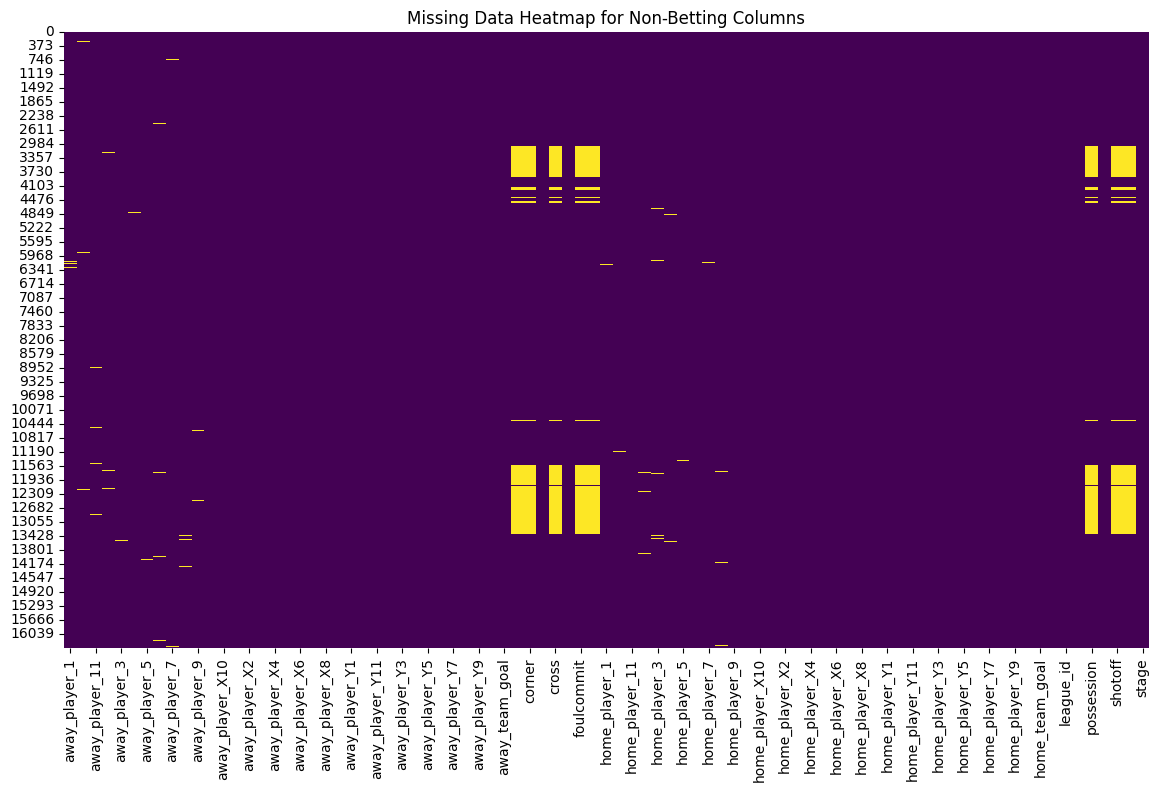

In [11]:
# Exclude the last 30 betting columns
non_betting_columns = match_df.columns.difference(betting_columns)

# Create a filtered DataFrame with only non-betting columns
filtered_match_df = match_df[non_betting_columns]

# Display the number of rows and columns in the filtered DataFrame
print(f"Rows: {filtered_match_df.shape[0]}, Columns: {filtered_match_df.shape[1]}")

# Calculate missing values in the filtered DataFrame
non_betting_missing = filtered_match_df.isnull().sum().sort_values(ascending=False)

# Display columns with missing values
print(non_betting_missing[non_betting_missing > 0])

# Visualize missing values for these non-betting columns using a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(match_df[non_betting_columns].isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap for Non-Betting Columns')
plt.show()

In [12]:
# List of match statistics columns with high missing values
match_stats_columns = ['corner', 'shoton', 'goal', 'card', 'cross', 'shotoff', 'possession', 'foulcommit']

# Check if the same rows have missing values for all these columns
missing_stats = filtered_match_df[match_stats_columns].isnull().all(axis=1).sum()
total_missing_rows = len(filtered_match_df[filtered_match_df[match_stats_columns].isnull().any(axis=1)])

print(f"Number of rows missing all match statistics: {missing_stats}")
print(f"Total rows with at least one missing match statistic: {total_missing_rows}")

Number of rows missing all match statistics: 2829
Total rows with at least one missing match statistic: 2829


In [13]:
# Drop rows where all match statistics are missing
filtered_match_df = filtered_match_df.dropna(subset=match_stats_columns)

# Verify the number of rows after dropping
print(f"Number of rows after dropping: {filtered_match_df.shape[0]}")


Number of rows after dropping: 13580


In [14]:
# Create a new column 'match_outcome' based on the goals scored
def determine_outcome(row):
    if row['home_team_goal'] > row['away_team_goal']:
        return 'home_win'
    elif row['home_team_goal'] < row['away_team_goal']:
        return 'away_win'
    else:
        return 'draw'

# Apply the function to create the label
filtered_match_df['match_outcome'] = filtered_match_df.apply(determine_outcome, axis=1)

# Display the distribution of match outcomes
print(filtered_match_df['match_outcome'].value_counts())


match_outcome
home_win    6312
away_win    3827
draw        3441
Name: count, dtype: int64


In [15]:
# List of player formation columns (X and Y coordinates for home and away players)
formation_columns = [col for col in filtered_match_df.columns if 'player_X' in col or 'player_Y' in col]

# Fill missing formation data using the last valid coordinates for the same team
for team_col in ['home_team_api_id', 'away_team_api_id']:
    for col in formation_columns:
        filtered_match_df[col] = filtered_match_df.groupby(team_col)[col].transform(lambda group: group.ffill().bfill())

In [16]:
# Check if there are any missing values remaining in the formation columns
missing_formations = filtered_match_df[formation_columns].isnull().sum()

# Display any columns with remaining missing values
print(missing_formations[missing_formations > 0])

Series([], dtype: int64)


In [17]:
# Check for any remaining missing values in the entire DataFrame
remaining_missing = filtered_match_df.isnull().sum().sort_values(ascending=False)

# Display columns with any remaining missing values
print(remaining_missing[remaining_missing > 0])

home_player_10    68
away_player_11    68
away_player_10    59
home_player_11    57
away_player_2     47
away_player_8     47
home_player_2     46
home_player_7     46
away_player_3     42
away_player_9     42
away_player_7     39
away_player_6     39
home_player_4     39
away_player_5     39
home_player_8     39
away_player_4     38
home_player_5     36
home_player_3     34
home_player_9     33
home_player_1     30
home_player_6     26
away_player_1     24
dtype: int64


In [18]:
# List of player ID columns
player_id_columns = [col for col in filtered_match_df.columns if 'home_player' in col or 'away_player' in col]
# Filter out the coordinate columns to focus only on the player IDs (ignoring X and Y)
player_id_columns = [col for col in player_id_columns if 'X' not in col and 'Y' not in col]

# Check the data type of the player ID columns
print(filtered_match_df[player_id_columns].dtypes)

# Display a sample of the values in these columns
print(filtered_match_df[player_id_columns].head(10))


away_player_1     float64
away_player_10    float64
away_player_11    float64
away_player_2     float64
away_player_3     float64
away_player_4     float64
away_player_5     float64
away_player_6     float64
away_player_7     float64
away_player_8     float64
away_player_9     float64
home_player_1     float64
home_player_10    float64
home_player_11    float64
home_player_2     float64
home_player_3     float64
home_player_4     float64
home_player_5     float64
home_player_6     float64
home_player_7     float64
home_player_8     float64
home_player_9     float64
dtype: object
   away_player_1  away_player_10  away_player_11  away_player_2  \
0        24224.0         34574.0         37799.0        25518.0   
1        36373.0         25922.0         27267.0        36832.0   
2        30660.0         24635.0         30853.0        37442.0   
3        34421.0        127857.0         34466.0        34987.0   
4        31432.0         33633.0        107216.0        46403.0   
5        306

In [19]:
# Fill missing values with -1 as a placeholder
filtered_match_df[player_id_columns] = filtered_match_df[player_id_columns].fillna(-1)

# Convert the player ID columns to integers
filtered_match_df[player_id_columns] = filtered_match_df[player_id_columns].astype(int)

# Check again for remaining missing values in these columns
remaining_missing = filtered_match_df.isnull().sum().sort_values(ascending=False)
print(remaining_missing[remaining_missing > 0])


Series([], dtype: int64)


In [20]:
# Define the key features to calculate rolling averages for
key_features = ['home_team_goal', 'away_team_goal', 'goal', 'possession', 'shoton', 'shotoff', 'corner', 'foulcommit', 'card', 'cross']

# Group the DataFrame by each team (home and away)
team_columns = ['home_team_api_id', 'away_team_api_id']


In [21]:
# Define a function to compute rolling averages and forward fill missing data
def compute_rolling_avg(df, team_column, feature):
    # Ensure the feature is numeric and forward-fill missing values
    if df[feature].dtype in ['float64', 'int64']:
        # Forward fill any null values in the feature
        df[feature] = df[feature].ffill()

        # Compute team's overall average for the feature
        team_avg = df.groupby(team_column)[feature].transform('mean')

        # Compute rolling average for last 5 matches (skip null values automatically)
        rolling_avg = df.groupby(team_column)[feature].rolling(window=5, min_periods=1).mean().reset_index(level=0, drop=True)

        # Fill any missing rolling averages with the team's overall average
        return rolling_avg.fillna(team_avg)
    else:
        return None

# Apply the function to all key numeric features for both home and away teams
for feature in key_features:
    filtered_match_df[f'{feature}_rolling_avg_home'] = compute_rolling_avg(filtered_match_df, 'home_team_api_id', feature)
    filtered_match_df[f'{feature}_rolling_avg_away'] = compute_rolling_avg(filtered_match_df, 'away_team_api_id', feature)


In [23]:
# Print the first few rows of the dataframe to check results
print("New Line")
print(filtered_match_df.head())

# Print specific columns with rolling averages for home goals
print("New Line")
print(filtered_match_df[['home_team_api_id', 'home_team_goal', 'home_team_goal_rolling_avg_home']].head(10))

# Print specific columns with rolling averages for away goals
print("New Line")
print(filtered_match_df[['away_team_api_id', 'away_team_goal', 'away_team_goal_rolling_avg_away']].head(10))

# Optionally, you can filter by a specific team to inspect rolling averages for that team
print("New Line")
team_id = 8455  # example team ID
team_matches = filtered_match_df[filtered_match_df['home_team_api_id'] == team_id]
print(team_matches[['home_team_api_id', 'home_team_goal', 'home_team_goal_rolling_avg_home']].head(10))


New Line
   away_player_1  away_player_10  away_player_11  away_player_2  \
0          24224           34574           37799          25518   
1          36373           25922           27267          36832   
2          30660           24635           30853          37442   
3          34421          127857           34466          34987   
4          31432           33633          107216          46403   

   away_player_3  away_player_4  away_player_5  away_player_6  away_player_7  \
0          24228          30929          29581          38807          40565   
1          23115          37280          24728          24664          31088   
2          30617          24134         414792          37139          30618   
3          35472         111865          25005          35327          25150   
4          24208          23939          33963          47413          40198   

   away_player_8  ...  shotoff_rolling_avg_home  shotoff_rolling_avg_away  \
0          30360  ...         